In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import statsmodels.api as sm
from statsmodels.api import OLS
import math

In [143]:
path_1 = "C:/Users/HP/Downloads/asset-v1_MITx+15.071x+2T2017+type@asset+block@pisa2009train.csv"
path_2 = "C:/Users/HP/Downloads/asset-v1_MITx+15.071x+2T2017+type@asset+block@pisa2009test.csv"


In [239]:
pisaTrain = pd.read_csv(path_1)
pisaTest = pd.read_csv(path_2)

In [240]:
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [241]:
pisaTrain.shape

(3663, 24)

In [242]:
pisaTrain.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore'],
      dtype='object')

Question 1.2

what is the average reading test score of males?

Of females?

In [243]:
avg_male_score = pisaTrain[pisaTrain['male'] == 1]['readingScore'].mean()
avg_female_score = pisaTrain[pisaTrain['male'] != 1]['readingScore'].mean()

In [244]:
avg_male_score 

483.53247863247805

In [245]:
avg_female_score

512.94063093244

Question 1.3

Which variables are missing data in at least one observation in the training set? Select all that apply



In [246]:
pisaTrain.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,...,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,...,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,...,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


<AxesSubplot:>

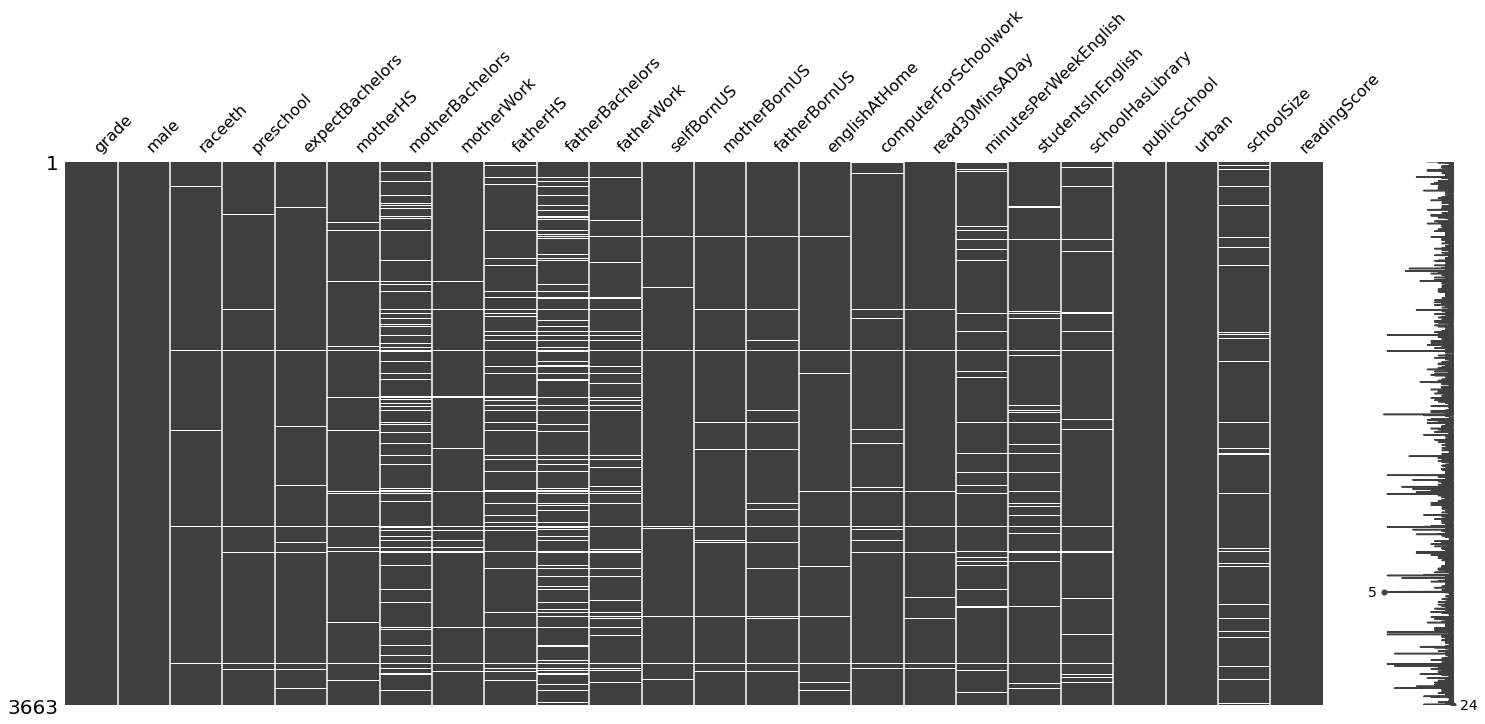

In [247]:
msno.matrix(pisaTrain)

Drop all missing rows

In [248]:
pisaTrain = pisaTrain.dropna()
pisaTest = pisaTest.dropna()

<AxesSubplot:>

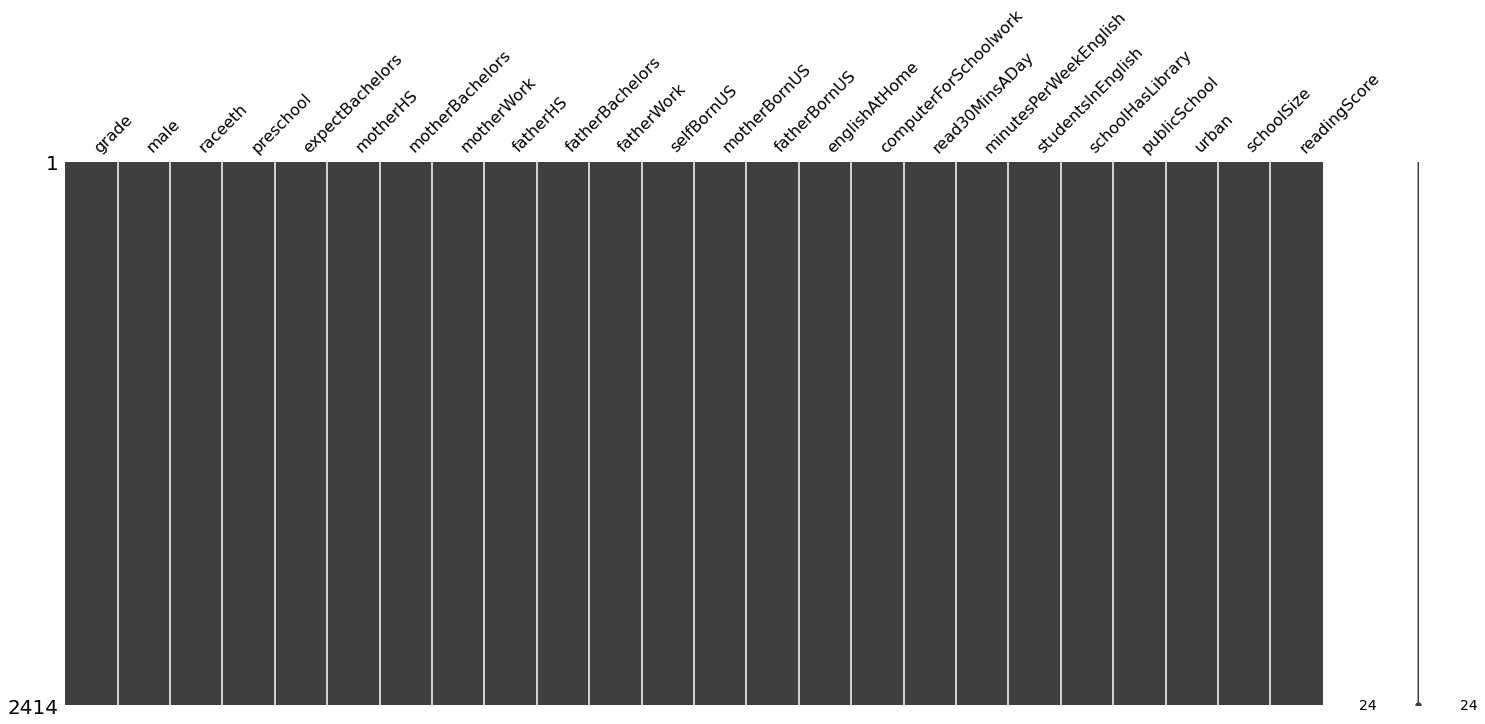

In [249]:
msno.matrix(pisaTrain)

<AxesSubplot:>

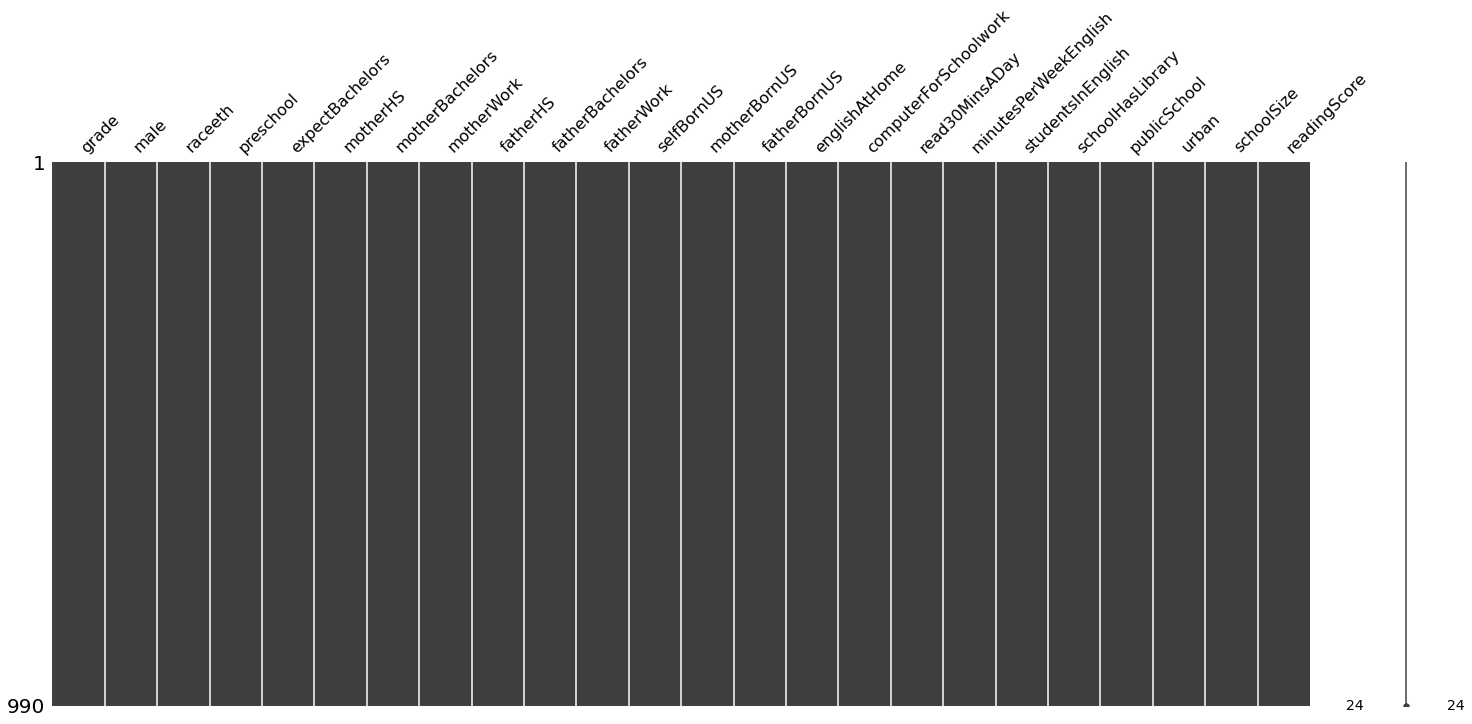

In [250]:
msno.matrix(pisaTest)

How many observations are now in the training set?

How many observations are now in the testing set?

  

In [251]:
pisaTrain.shape

(2414, 24)

In [252]:
pisaTest.shape

(990, 24)

Building a Model

we need to convert the unordered variable raceeth to a dummy variable

In [253]:
pisaTrain = pd.get_dummies(pisaTrain,prefix='raceeth',drop_first=True)
pisaTest = pd.get_dummies(pisaTest,prefix='raceeth',drop_first=True)

In [268]:
X = pisaTrain.drop(['readingScore'], axis=1)
y = pisaTrain['readingScore']

In [255]:
X = sm.add_constant(X)
lm = OLS(y,X).fit()

In [229]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           readingScore   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     41.04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.72e-180
Time:                        12:25:23   Log-Likelihood:                -13795.
No. Observations:                2414   AIC:                         2.765e+04
Df Residuals:                    2385   BIC:                         2.781e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             76.4890     37.303      2.050      0.040       3.340     149.638
grade                                             29.5427      2.937     10.057      0.000      23.783      35.303
male                                             -14.5217      3.156     -4.601      0.000     -20.710      -8.333
preschool                                         -4.4637      3.486     -1.280      0.201     -11.300       2.372
expectBachelors                                   55.2671      4.294     12.871      0.000      46.847      63.687
motherHS                                           6.0588      6.091      0.995      0.320      -5.886      18.004
motherBachelors                                   12.6381      3.861      3.273      0.001       5.066      20.210
motherWork                                        -2.8091      3.522     -0.798      0.425      -9.715       4.097
fatherHS                                           4.0182      5.579      0.720      0.471      -6.923      14.959
fatherBachelors                                   16.9298      3.995      4.237      0.000       9.095      24.764
fatherWork                                         5.8428      4.396      1.329      0.184      -2.778      14.463
selfBornUS                                        -3.8063      7.324     -0.520      0.603     -18.168      10.555
motherBornUS                                      -8.7982      6.588     -1.336      0.182     -21.716       4.120
fatherBornUS                                       4.3070      6.264      0.688      0.492      -7.976      16.590
englishAtHome                                      8.0357      6.859      1.171      0.242      -5.415      21.487
computerForSchoolwork                             22.5002      5.703      3.946      0.000      11.318      33.683
read30MinsADay                                    34.8719      3.408     10.231      0.000      28.188      41.556
minutesPerWeekEnglish                              0.0128      0.011      1.194      0.233      -0.008       0.034
studentsInEnglish                                 -0.2866      0.228     -1.258      0.208      -0.733       0.160
schoolHasLibrary                                  12.2151      9.265      1.318      0.187      -5.953      30.383
publicSchool                                     -16.8575      6.726     -2.506      0.012     -30.046      -3.669
urban                                             -0.1101      3.963     -0.028      0.978      -7.881       7.661
schoolSize                                         0.0065      0.002      2.977      0.003       0.002       0.011
raceeth_Asian                                     63.1670     18.973      3.329      0.001   

In [174]:
y_pred = lm.predict(X)

5762082.371144438

In [182]:
SSE = sum((y - y_pred)**2)
RMSE = math.sqrt(SSE/pisaTrain.shape[0])
RMSE2 = math.sqrt(((y - y_pred)**2).mean())

In [256]:
X_t = pisaTest.drop(['readingScore'], axis=1)
y_t = pisaTest['readingScore']
X_t = sm.add_constant(X_t)

In [257]:
ypred2 = lm.predict(X_t) #on test data

In [260]:
ypred2.max() -ypred2.min() 

284.4683117951305

In [262]:
SSE2 = sum((y_t - ypred2)**2)
RMSE2 = math.sqrt(SSE/pisaTest.shape[0])


In [263]:
SSE2

5762082.371144438

In [264]:
RMSE2

76.29079383109223

In [269]:
#baseline
y.mean()

517.9628873239429

In [281]:
SST = sum((y.mean() - y_t)**2)

In [282]:
SST

7802354.077613839

In [283]:
R_sq = 1 - (SSE2/SST)

In [284]:
R_sq

0.26149437543769716